<a href="https://colab.research.google.com/github/vince-camm/ESSENTIALS-FINAL/blob/main/FINAL_GROUP_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Take-Home Project
Vincent Cammisa
Zoey Wilkins
Daniel Laedon

##(1) Data Description and Preparation
## (A)
 Write one or two paragraphs describing your data set. Please make sure you
- The dataset contains comprehensive information on player attributes and wages for 3,900 professional football players from the top six leagues, with data extracted from the game FM22 and accurate as of 2022. This dataset provides a valuable resource for analyzing and predicting player wages based on various factors. Key variables include player attributes such as Age, Club, and Position, alongside other indicators. By leveraging this data, it is possible to explore how specific quantitative and categorical variables influence wage levels, uncovering patterns and insights into the financial dynamics of professional football.
LINK:https://www.kaggle.com/datasets/ultimus/football-wages-prediction

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

## B)
Create a pandas DataFrame containing only the response variable and the 3 quantitative variables you have selected. Address any missing values in your DataFrame by either removing them (if they are not very many) or by using an imputation method. Briefly explain your choice.

- There are no missing variables in this dataset so imputation or dropping variables were not neccessary

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/SalaryPrediction.csv" .

df = pd.read_csv("SalaryPrediction.csv")

Mounted at /content/drive


In [3]:
df

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45
...,...,...,...,...,...,...,...,...
3902,"3,400",19,Vigo,La Liga,ESP,Defender,0,0
3903,"3,200",18,Famalicao,Primiera Liga,BRA,Goalkeeper,0,0
3904,"2,900",18,Vigo,La Liga,ESP,Forward,0,0
3905,"2,700",18,Vigo,La Liga,ESP,Defender,0,0


In [4]:
wage = df[['Wage','Age', 'Apps', 'Caps']]

In [5]:
wage

,Wage,Age,Apps,Caps
0,"46,427,000",23,190,57
1,"42,125,000",30,324,119
2,"34,821,000",35,585,162
3,"19,959,000",31,443,120
4,"19,500,000",31,480,45
...,...,...,...,...
3902,"3,400",19,0,0
3903,"3,200",18,0,0
3904,"2,900",18,0,0
3905,"2,700",18,0,0


## (C)
Use the normalize function in class to rescale the explanatory variables in the
DataFrame in (b) so that they are all between 0 and 1. Verify that it was properly
normalized by using the describe() function from the pandas package to calculate
the descriptive statistics for each of the quantitative variable in the data set.

In [6]:
def normalize(x):
    x_norm = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x_norm

In [7]:
wage['Age'] = normalize(wage['Age'])
wage['Apps'] = normalize(wage['Apps'])
wage['Caps'] = normalize(wage['Caps'])

<ipython-input-7-e199dcdc18a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage['Age'] = normalize(wage['Age'])
<ipython-input-7-e199dcdc18a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage['Apps'] = normalize(wage['Apps'])
<ipython-input-7-e199dcdc18a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [8]:
print(wage.describe())

               Age         Apps         Caps
count  3907.000000  3907.000000  3907.000000
mean      0.266111     0.195884     0.049592
std       0.214593     0.184188     0.113990
min       0.000000     0.000000     0.000000
25%       0.086957     0.020979     0.000000
50%       0.260870     0.160839     0.000000
75%       0.434783     0.313986     0.033333
max       1.000000     1.000000     1.000000


##(D)
Split your normalized DataFrame from (c) into a training set and a test set. Use
20% of the data for the test set. Set the random state to any two-digit integer. All
the models below will be fitted or trained on the training set only.

In [9]:
wage['Wage'] = pd.to_numeric(wage['Wage'].str.replace(',', '').str.replace('€', ''))

X = wage[['Age', 'Apps', 'Caps']]  # Explanatory variables
y = wage['Wage']  # Response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-9-9ba9cb6456f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage['Wage'] = pd.to_numeric(wage['Wage'].str.replace(',', '').str.replace('€', ''))


## 2) First-Order Multiple Linear Regression Model

## (A)
Write a first-order model for the response variable (y) as a function of the three quantitative explanatory variables you selected. (Here, the coefficients are unspecified. Include the error term in the model and state the assumptions.)

y = Beta0 + Beta1 * X1 + Beta2 * X2 + Beta3 * X3 + E

##(B)
 Use the scatter matrix() function from the plotly package to create a scatterplot
matrix of the variables in your training data from (3) above. Calculate also a correlation matrix showing the correlations between each pair of quantitative variables
in your training data set.

In [10]:
import plotly.express as px

In [11]:
train_wage = pd.concat([X_train, y_train], axis=1)

fig = px.scatter_matrix(train_wage, dimensions=['Age', 'Apps', 'Caps'], color='Wage', title="Scatterplot Matrix")
fig.show()

# Calculate Correlation Matrix
correlation_matrix = train_wage[['Age', 'Apps', 'Caps']].corr()
print(correlation_matrix)

## (C)
Perform the multiple regression procedure on the training data set in Python. Show
the summary output and the ANOVA table.

In [12]:
!pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [13]:
X_train_const = sm.add_constant(X_train)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train_const).fit()

print(model.summary())
anova_data = pd.DataFrame({'resid': model.resid,
                           'fittedvalues': model.fittedvalues,
                           'Age': X_train['Age'],
                           'Apps': X_train['Apps'],
                           'Caps': X_train['Caps']})

anova_table = anova_lm(smf.ols('resid ~ fittedvalues + Age + Apps + Caps', data=anova_data).fit())

print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     609.1
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          1.22e-311
Time:                        23:47:08   Log-Likelihood:                -49716.
No. Observations:                3125   AIC:                         9.944e+04
Df Residuals:                    3121   BIC:                         9.946e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.793e+05   5.66e+04     10.231      0.0

## (D)
 Write the least squares prediction equation for the response variable. (Note: This
does not include the error term in the model.)
- Wage = 579278.81 + -4345869.05 * Age + 7190023.29 * Apps + 10327452.89 * Caps

In [14]:
print("Wage =", model.params[0], "+",  model.params[1], "* Age +", model.params[2], "* Apps +", model.params[3], "* Caps")

Wage = 579278.8112849529 + -4345869.052337444 * Age + 7190023.287149105 * Apps + 10327452.894118186 * Caps


<ipython-input-14-8ee50e036bde>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



## (E)
Conduct a test of overall model utility (the global F-test) at the 5% level. State the
hypotheses, write the value of the test statistic, report the p-value, and state the
conclusion. Is the model statistically useful for predicting the response?
-  Hypotheses:
 - H0: β1 = β2 = β3 = 0 (The model is not statistically useful)
 - H1: At least one βi ≠ 0 (The model is statistically useful)
- F-Statistix: 609.08
- Pvalue: 0.000000
- So we can reject the null hypothesis, the model is statistically useful for predicting the response.

In [15]:
# Test statistic:
f_statistic = model.fvalue
print(f"F-statistic: {f_statistic}")

# P-value:
p_value = model.f_pvalue
print(f"P-value: {p_value}")

# Conclusion:
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. The model is statistically useful for predicting the response.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The model is not statistically useful for predicting the response.")

F-statistic: 609.0806923571348
P-value: 1.2241609198273e-311
Conclusion: Reject the null hypothesis. The model is statistically useful for predicting the response.


##(F)
 Report the p-values for the t-tests on the individual β parameters of the model (the
coefficients of the above explanatory variables). Which of the above explanatory
variables are statistically useful for predicting the response variable?
- All the explanatory variables are statistically signifcant
##(G)
Report and interpret the R2
a value for the model.
- The R-Squared is 36.93%, meaning about 37 percent of the variability in the dependent wage, is explained by these variables. Some of it is due to categorical variables being Omitted variables

In [16]:
print(model.pvalues)

alpha = 0.05
significant_vars = []
for var, p_value in model.pvalues.items():
    if p_value < alpha and var != 'const':
        significant_vars.append(var)
print("\nStatistically significant variables:", significant_vars)


# (g)
r_squared = model.rsquared
print(f"\nR-squared: {r_squared}")
print(f"Interpretation: {r_squared*100:.2f}% of the variability in the response variable (Wage) is explained by the model.")

const     3.445248e-24
Age       1.455798e-22
Apps      2.577146e-39
Caps     7.714124e-152
dtype: float64

Statistically significant variables: ['Age', 'Apps', 'Caps']

R-squared: 0.3692709549393852
Interpretation: 36.93% of the variability in the response variable (Wage) is explained by the model.


## (H)
Create a residual plot for the model. That is, create a scatterplot of the residuals vs
the fitted values (or predicted values). Is this a good residual plot? Briefly explain.
Create also a histogram of the residuals
- The residual plot shows it is a good predictor when the wages are lower but the variabilty increases out of proportion as the wages would increase. Some of the variability is due to omitted varaible bias

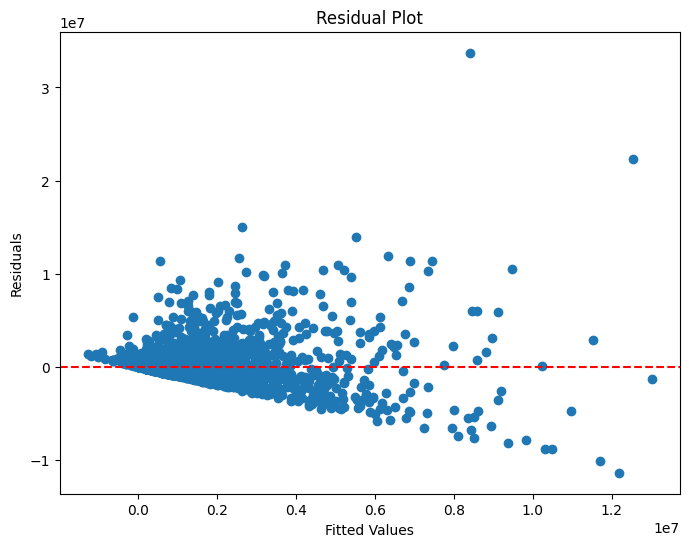

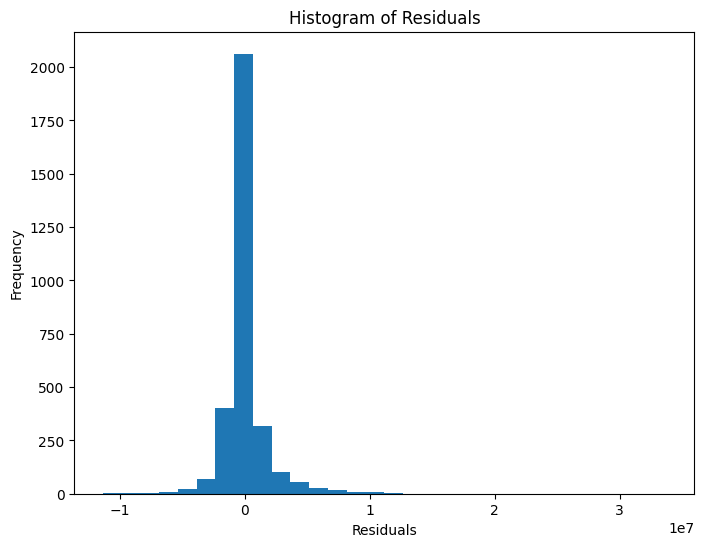

In [17]:


# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(model.resid, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

##(I)
Based on the results from (e), (g) and (h), would you recommend using your model
to predict the response variable?
- I beleive that because the model is restricted to quanitative variables, we have a lower R-squared of approximately 37%. However in the context of the dataset,  predicting a futbol players wage based on strictly appereances, international appearances, and age, will yield these expected results. It is not by all means useless, but we can easily fix the low r-squared. Variables like the club they play for and what league that club is in matters, and we clearly have highly statistically significant variables as it is so adding a couple more categorical would perfect the model.

## (J)
Regardless of the outcome of (i) above, calculate the predicted values of the first-
order multiple regression model on the test set. Then, calculate the RMSE (root
mean square error) of the model on the test set.
- RMSE of 2475813
- Because a lot of the wages are in the millions this is not a terrible result

In [18]:
X_test_const = sm.add_constant(X_test)

y_pred = model.predict(X_test_const)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test set: {rmse}")

RMSE on the test set: 2475813.1621288336


# 3) Second-Order Multiple Linear Regression


# (a)
Write a complete second-order model for the response variable (y) as a function of
the three quantitative explanatory variables you selected. (Note: This includes all
interaction terms and all curvature terms. As before, include the error term in the
model and state the assumptions.)

 y = Beta0 + Beta1 * X1 + Beta2 * X2 + Beta3 * X3 + Beta 1 1 * X1^2 + Beta 2 2 * X2^2 + Beta 3 3 * X3^2 + Beta 1 2 * X1 * X2 + Beta 1 3 * X1 * X3 + Beta 2 3 * X2 * X3 + E

# (b)
Fit the second-order model on the training data set in Python. Show the summary
output and the ANOVA table.

In [19]:
secondorder = 'Wage ~ Age + Apps + Caps + I(Age**2) + I(Apps**2) + I(Caps**2) + I(Age*Apps) + I(Age*Caps) + I(Apps*Caps)'
reg = smf.ols(secondorder, data=train_wage)
res = reg.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     274.5
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:49:34   Log-Likelihood:                -49524.
No. Observations:                3125   AIC:                         9.907e+04
Df Residuals:                    3115   BIC:                         9.913e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.423e+05   6.53e+04      2.

In [20]:
secondorder_anova_table = anova_lm(res, typ=2)
print(secondorder_anova_table)

                      sum_sq      df           F        PR(>F)
Age             2.178869e+13     1.0    6.371577  1.164556e-02
Apps            2.188706e+14     1.0   64.003445  1.735278e-15
Caps            9.402904e+14     1.0  274.965303  3.026065e-59
I(Age ** 2)     9.631230e+12     1.0    2.816421  9.340453e-02
I(Apps ** 2)    1.625370e+11     1.0    0.047530  8.274326e-01
I(Caps ** 2)    7.155997e+11     1.0    0.209260  6.473800e-01
I(Age * Apps)   1.503519e+13     1.0    4.396680  3.608940e-02
I(Age * Caps)   5.956984e+14     1.0  174.197661  9.638849e-39
I(Apps * Caps)  2.762321e+14     1.0   80.777432  4.281335e-19
Residual        1.065227e+16  3115.0         NaN           NaN


# (c)


In [21]:
p_value = res.pvalues[0]
r_squared = res.rsquared
r_squared_adj = res.rsquared_adj

<ipython-input-21-0f4e2e14f042>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [22]:
print("P-value for the overall model : ", p_value)
print("R-squared : ", r_squared)
print("Adjusted R-squared : ", r_squared_adj)

P-value for the overall model :  0.02940568435829294
R-squared :  0.4423337105013162
Adjusted R-squared :  0.4407224756359909


In [23]:
# Conclusion:
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. The model is statistically useful for predicting the response.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The model is not statistically useful for predicting the response.")

Conclusion: Reject the null hypothesis. The model is statistically useful for predicting the response.


# Our R-Squared is 43.78%, meaning approximately 43.78%  of the variability in the dependent wage is explained by these variables in the second-order model. This percentage is higher than the adjusted R-squared value in the first-order model which was 36.93%. We expect the second-order model will be better for making predictions.




# (d)

In [24]:
X_test_const = sm.add_constant(X_test)
y_pred = res.predict(X_test_const)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on the test set:", rmse)

RMSE on the test set: 2280520.934088251


# # 4) k-Nearest Neighbors for Regression

# (a)

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [26]:
numk = 10
kvalues = np.zeros(numk)
RMSETestSet = np.zeros(numk)
for k in range(1,numk+1):
    kvalues[k-1] = k
knnreg = KNeighborsRegressor(n_neighbors=k)
knnreg.fit(X_train, y_train)
y_pred = knnreg.predict(X_test)
RMSETestSet[k-1] = np.sqrt(mean_squared_error(y_test, y_pred))
results_test = pd.concat([pd.Series(kvalues), pd.Series(RMSETestSet)],\
axis=1)
results_test.columns = ['k', 'RMSE']
rmse_k10 = results_test[results_test['k'] == 10]['RMSE'].values[0]


In [27]:
print("RMSE for k = ", k, ":", rmse_k10)

RMSE for k =  10 : 2364317.3483076473


# (b)

#
Our RMSE for k = 10 value of 2,364,874.39 is larger than our RMSE value of 2,268,908.02 from above, so the second-order model has the better predictive ability on the test set.

# **Part 2: Statistical and Machine Learning Methods for Classification**

*   List item
*   List item



In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

## 1. Data Description and Preparation

### (a) Description of dataset

https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

The dataset that was selected is to determine whether a mushroom is edible or poisonous based on their physical and seasonal characteristics. The dataset contains a mix of numerical variables and categorical variables which are represented in a numerical format. The variables that are being analyzed to predict the edibility of mushrooms are cap diameter, cap shape, gill attachment, gill color, stem height, stem width, stem color, and season. The target variable in this data set is class.

For this assignment the variables that we are using to predict the edibility of a mushroom, or the target variable class, are its stem height, stem width, and stem color. We are using the machine learning models KNN classifer, decision tree, and random forrest tree to identify the most effective predictive model to predict a mushroom edibility. These models will be evaluated and compared based on their accuracy.

### (b) Pandas dataframe with response variable (class) and three quantative variables (stem-height, stem-width, stem-color). Address any missing values.

In [29]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/My Drive/mushroom.csv" .

mushroom = pd.read_csv("mushroom.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# separating the target variable and the three quantative variable from dataset
selected_columns = ['class', 'stem-height', 'stem-width', 'stem-color']
mushroom = mushroom[selected_columns]

In [31]:
# check for missing values
missing_count = mushroom.isnull().sum()
missing_count

,0
class,0
stem-height,0
stem-width,0
stem-color,0


There were no missing values in the dataset. If there were to be any missing values an imputation method would have been perform to impute the missing values with either the mean or median to resist outliers, minimize bias, and to keep the datasets central tendency.

### (c) Normalize dataset

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Normalize explanatory variables
scaler = MinMaxScaler()
mushroom.iloc[:, 1:] = scaler.fit_transform(mushroom.iloc[:, 1:])

# Verify normalization using describe()
print("Normalized DataFrame:\n", mushroom.describe())

Normalized DataFrame:
               class   stem-height    stem-width    stem-color
count  54035.000000  54035.000000  54035.000000  54035.000000
mean       0.549181      0.197837      0.294503      0.701505
std        0.497580      0.169749      0.219125      0.271840
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.070555      0.117960      0.500000
50%        1.000000      0.154599      0.258616      0.916667
75%        1.000000      0.274957      0.426730      0.916667
max        1.000000      1.000000      1.000000      1.000000


<ipython-input-32-a8285a83cda3>:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.43289437 0.43625665 0.43877837 ... 0.16363127 0.13757355 0.13785374]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

<ipython-input-32-a8285a83cda3>:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.91666667 0.91666667 0.91666667 ... 1.         1.         1.        ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



### (d) Split data into testing and training set

In [33]:
X = mushroom.iloc[:, 1:]  # Explanatory variables
y = mushroom['class']     # Response variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (43228, 3), Test set size: (10807, 3)


## 2. Comparision of Machine Learning Methods of Classification

### (a) KNN Classification

In [34]:
# Create a KNN classifier with k=10
knn = KNeighborsClassifier(n_neighbors=10)

In [35]:
# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [37]:
# Calculate the accuracy
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)

Accuracy: 0.8073470898491718


### (b) Decision Tree

In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

In [40]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [42]:
# Evaluate the accuracy of the classifier
decision_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", decision_accuracy)

Accuracy: 0.7626538354770056


### (c) Random Forrest: (100 trees and 500 trees)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
# Create a Random Forest classifier for 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=237)

In [45]:
# Fit the model to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=237)

In [46]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [47]:
# Calculate the accuracy (100 trees)
random_accuracy_100 = accuracy_score(y_test, y_pred)
print("Accuracy:", random_accuracy_100)

Accuracy: 0.802720458961784


In [48]:
# Create a Random Forest classifier for 500 trees
clf = RandomForestClassifier(n_estimators=500, random_state=237)

In [49]:
# Fit the model to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=237)

In [50]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [51]:
# Calculate the accuracy (500 trees)
random_accuracy_500 = accuracy_score(y_test, y_pred)
print("Accuracy:", random_accuracy_500)

Accuracy: 0.8049412417877302


### (d) Comparision of accuracy scores

In [52]:
print('Accuracy comparison: ')
print('KNN Classification: ', knn_accuracy)
print('Decision Tree: ', decision_accuracy)
print('Random Forrest (100 trees): ', random_accuracy_100)
print('Random Forrest (500 trees): ', random_accuracy_500)

Accuracy comparison: 
KNN Classification:  0.8073470898491718
Decision Tree:  0.7626538354770056
Random Forrest (100 trees):  0.802720458961784
Random Forrest (500 trees):  0.8049412417877302


The KNN classifier had the best accuracy on the test set with an accuracy of 80.73%. Both of the Random Forrest claffication models that were performed (100 trees and 500 trees) had accuracy scores that were close to the KNN classifier with accuracy scores of 80.02% and 80.55%. The Decision Tree classification model performed the worst compared to the other models with an accuracy score of 76.32%. Overall, all the models had a fairly good accuray on the test set.